Dataset downloaded from https://www.kaggle.com/amananandrai/ag-news-classification-dataset

In [6]:
import os
import pandas as pd
import json
import re
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Model
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [98]:
df = pd.read_csv('train.csv')

In [99]:
df['Description'] = df['Description'].str.replace('(?:&)(.){1,4};', '', regex=True)
df['Description'] = df['Description'].str.replace('(?:#)(.){1,4};', '', regex=True)
df['Description'] = df['Description'].str.replace('b.../b', '', regex=True)
df['Description'] = df['Description'].str.replace(' s ', '', regex=True)
df['Description'] = df['Description'].str.replace('(?:quot;).*quot;', '', regex=True)

In [9]:
# df['Description'] = df['Description'].str.replace('british airways', 'britishairways', regex=False)
# df['Description'] = df['Description'].str.replace('new york city', 'newyorkcity', regex=False)
# df['Description'] = df['Description'].str.replace('new york', 'newyork', regex=False)

The dataframe has two text columns. We could concatenate them together as a single entry, but common sense tells us they are qualitatively different fields that have their own separate word distributions. Let's build a concetenation model to treat both fields as separate features.

In [100]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [101]:
text = ' '.join(df['Description']).lower()
split_it = text.split()
counts = Counter(split_it)
counts = counts.most_common(20)

In [102]:
counts

[('the', 196092),
 ('a', 104041),
 ('to', 94737),
 ('of', 88345),
 ('in', 77494),
 ('and', 65160),
 ('on', 46737),
 ('-', 38008),
 ('for', 37548),
 ('that', 26778),
 ('with', 22438),
 ('as', 21604),
 ('its', 21029),
 ('at', 20610),
 ('is', 19542),
 ('by', 18520),
 ('has', 18129),
 ('new', 16744),
 ('it', 16514),
 ('said', 16380)]

In [ ]:
STOPWORDS

In [103]:
STOPWORDS.add('u')
STOPWORDS.add('said')

In [104]:
wordcloud = WordCloud(
    width= 3000, 
    height = 2000, 
    max_words = 400, 
    colormap='Pastel1', 
    stopwords = STOPWORDS).generate(text)

(-0.5, 2999.5, 1999.5, -0.5)

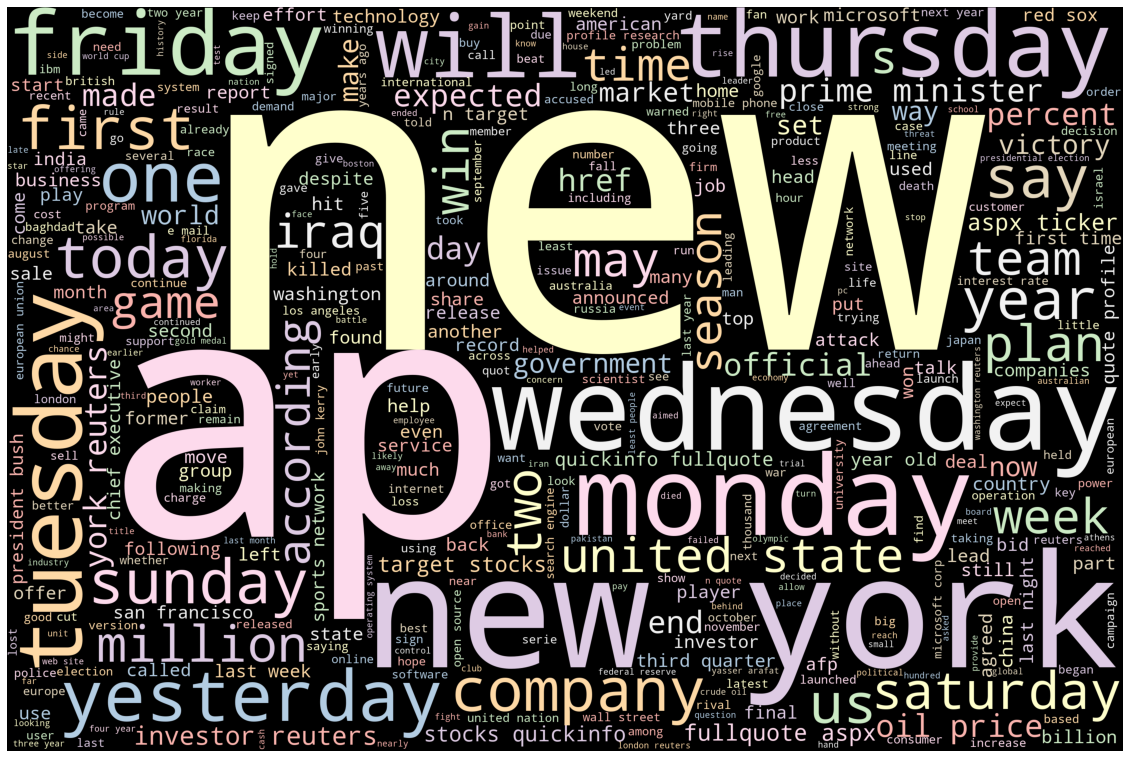

In [105]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud) 
plt.axis("off")

In [20]:
df['Class Index'].value_counts()
#ext = ' '.join(df['Description']).lower()


1    30000
2    30000
3    30000
4    30000
Name: Class Index, dtype: int64

In [106]:
world = df[df['Class Index'] == 1]
sports = df[df['Class Index'] == 2]
business = df[df['Class Index'] == 3]
sci = df[df['Class Index'] == 4]

(-0.5, 2999.5, 1999.5, -0.5)

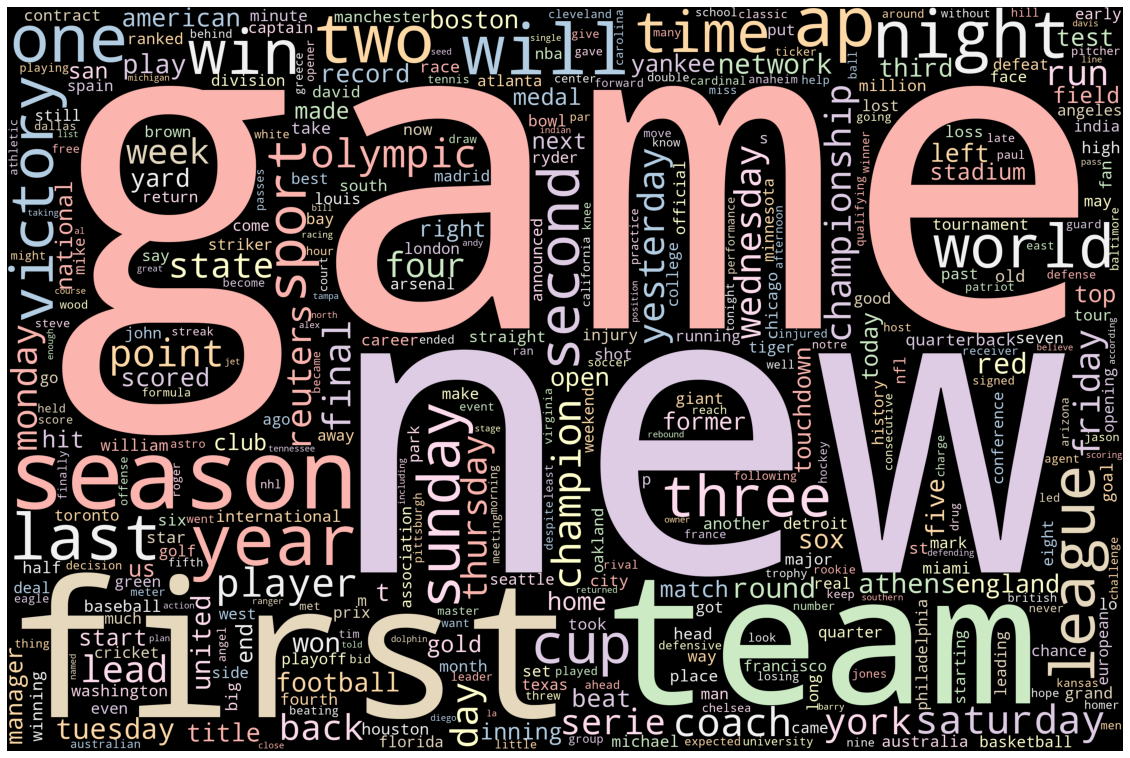

In [46]:
text = ' '.join(one_cat['Description']).lower()

wordcloud = WordCloud(
    width= 3000, 
    height = 2000, 
    random_state=1, 
    max_words = 400, 
    colormap='Pastel1', 
    collocations=False, 
    stopwords = STOPWORDS).generate(world)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud) 
plt.axis("off")

In [107]:
world_lengths = first['Description'].apply(lambda x: len(x))
sports_lengths = second['Description'].apply(lambda x: len(x))
business_lengths = third['Description'].apply(lambda x: len(x))
sci_lengths = fourth['Description'].apply(lambda x: len(x))

Populating the interactive namespace from numpy and matplotlib


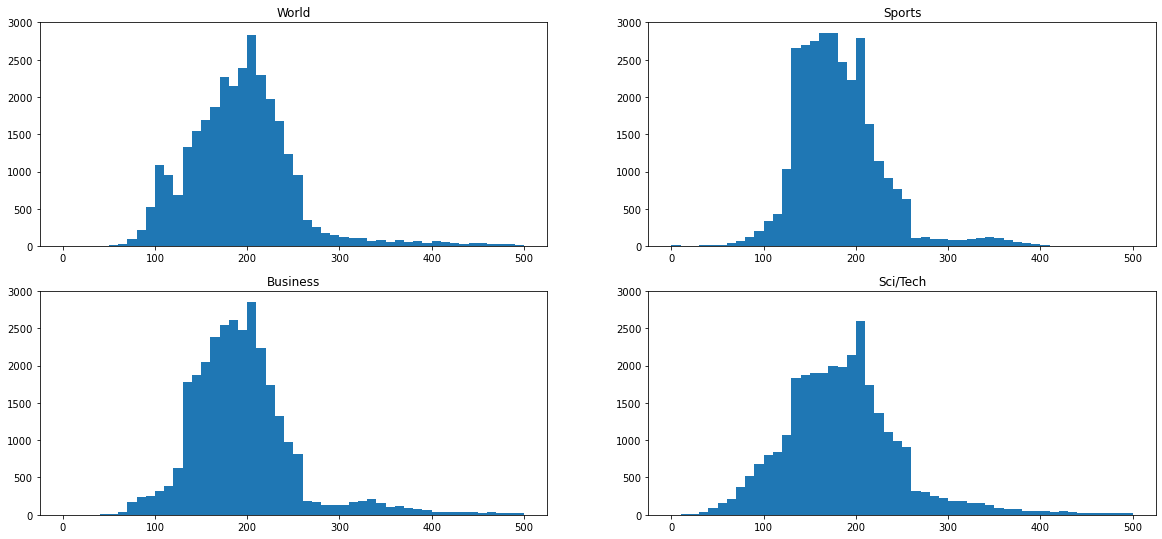

In [134]:
from matplotlib import pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 14)

dfs = [world_lengths, sports_lengths, business_lengths, sci_lengths]
titles = ['World', 'Sports', 'Business', 'Sci/Tech']

plot_num = 1

for i in range(len(dfs)):
    fig = plt.subplot(3,2,plot_num)

    axes = plt.gca()
    axes.set_ylim([0,3000])
    one_cat = dfs[i]
    plt.hist(one_cat, bins=50, range=(0,500))
    title = plt.gca().set_title(titles[i])
    plot_num += 1
    
plt.show()

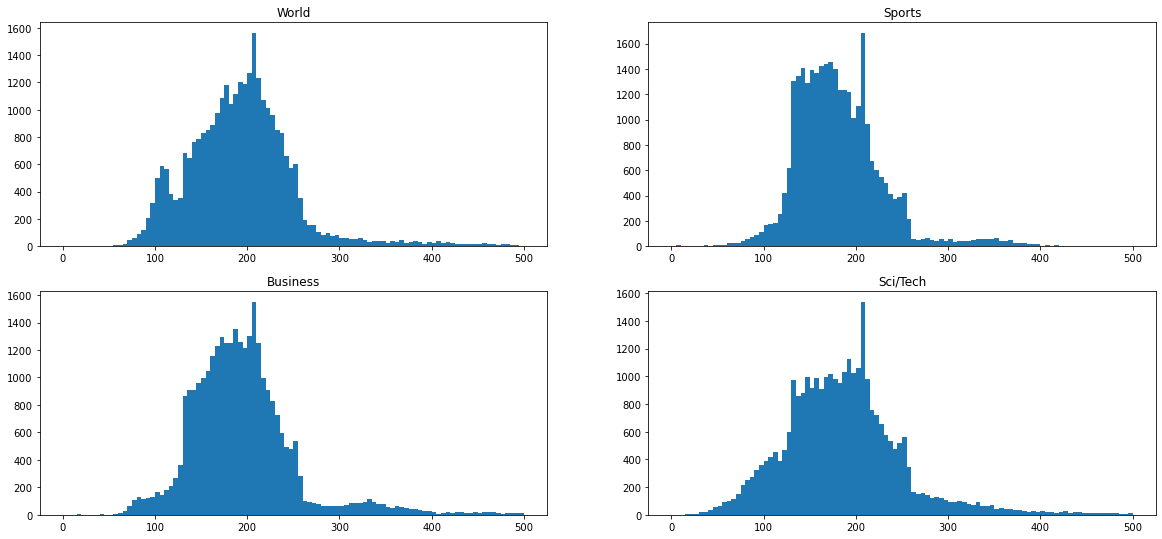

In [115]:
dfs = [world_lengths, sports_lengths, business_lengths, sci_lengths]
titles = ['World', 'Sports', 'Business', 'Sci/Tech']

plot_num = 1

for i in range(len(dfs)):
    fig = plt.subplots(3,2,plot_num)

    axes = plt.gca()
    #axes.set_ylim([0,15])
    one_cat = dfs[i]
    plt.hist(one_cat, bins=100, range=(0,500))
    title = plt.gca().set_title(titles[i])
    plot_num += 1
    
plt.show()

In [112]:
plt.subplots?

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 'none': each subplot x- or y-axis will be independent.
    - 'row': each subplot row will share an x- or y-axis.
    - 'col': each subplot column will share an x- or y-axis.

    When subplots have a shared x-axis along a column, only the x tick
    labels of the bottom subplot are created. Similarly, 

In [93]:
print('Average world article length:', int(round(world_lengths.mean(), 0)))
print('Average sport article length:', int(round(sports_lengths.mean(), 0)))
print('Average business article length:', int(round(business_lengths.mean(), 0)))
print('Average sci/tech article length:', int(round(sci_lengths.mean(), 0)))

Average world article length: 193
Average sport article length: 181
Average business article length: 195
Average sci/tech article length: 190


We'll keep track of hyperparameters and other useful details related to this run in a text log. Let's define these values as constants here.

In [16]:
NOTES = ''
LEN = len(df)
SPLIT = 0.9
LAYERS = 2
DROPOUT = 0.5
BATCH = 100
EPOCHS = 5
SMOOTHING = 0.1
NODES_1 = 100
NODES_2 = 32
NODES_3 = 0

The singular feature for the left branch of the modelis stored in the variable X. The one-hot encoded output variable

In [6]:
log = pd.read_csv('text_and_title.csv')

X = df['Description']
Y = pd.get_dummies(df['Class Index'])

In [7]:
encoder = tf.keras.layers.TextVectorization(
    max_tokens=None)

encoder.adapt(X)

In [8]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), NODES_1, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(NODES_1,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(NODES_2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(DROPOUT),
    tf.keras.layers.Dense(Y.shape[1], activation='softmax')
])

In [9]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=SMOOTHING, from_logits=False),
            optimizer=tf.keras.optimizers.Adam(1e-4),
            metrics=([tf.keras.metrics.CategoricalCrossentropy(name='CatCrossentropy'), 
            tf.keras.metrics.CategoricalAccuracy(name='CatAccuracy'),
            tf.keras.metrics.Recall(name='Recall')]))

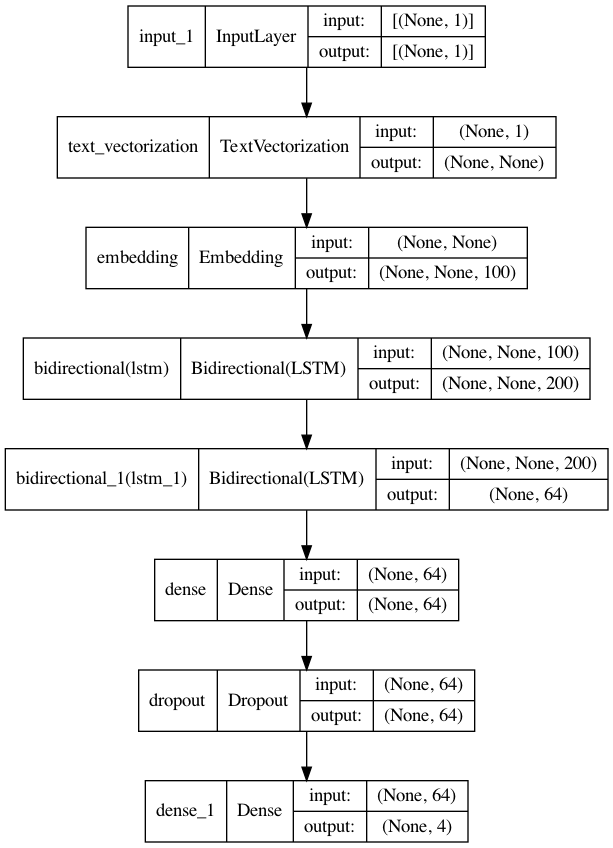

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 100)         10654000  
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [12]:
history = model.fit(x=X.values, y=Y.values, batch_size = BATCH, epochs=EPOCHS,
    validation_split=SPLIT, verbose=True)

Epoch 1/5
120/120 [==============================] - 136s 1s/step - loss: 1.3759 - CatCrossentropy: 1.3747 - CatAccuracy: 0.3875 - Recall: 0.0000e+00 - val_loss: 1.3491 - val_CatCrossentropy: 1.3447 - val_CatAccuracy: 0.5292 - val_Recall: 0.0000e+00
Epoch 2/5
120/120 [==============================] - 133s 1s/step - loss: 1.0228 - CatCrossentropy: 0.9380 - CatAccuracy: 0.6696 - Recall: 0.3432 - val_loss: 0.8812 - val_CatCrossentropy: 0.7628 - val_CatAccuracy: 0.7278 - val_Recall: 0.5725
Epoch 3/5
120/120 [==============================] - 136s 1s/step - loss: 0.7265 - CatCrossentropy: 0.5488 - CatAccuracy: 0.8424 - Recall: 0.7471 - val_loss: 0.7958 - val_CatCrossentropy: 0.6382 - val_CatAccuracy: 0.7755 - val_Recall: 0.7120
Epoch 4/5
120/120 [==============================] - 148s 1s/step - loss: 0.6160 - CatCrossentropy: 0.4011 - CatAccuracy: 0.9056 - Recall: 0.8607 - val_loss: 0.7899 - val_CatCrossentropy: 0.6178 - val_CatAccuracy: 0.7823 - val_Recall: 0.7418
Epoch 5/5
120/120 [=====

In [13]:
pred = model.predict(df['Description'])
pred = pd.Series(np.argmax(pred, axis=1))
pred += 1
df['pred'] = pred


ACC = len(df[df['pred']==df['Class Index']])/len(df)
print(ACC)

0.8017583333333334


In [14]:
row = {'accuracy': ACC, 'notes': NOTES, 'len': LEN,
    'split': SPLIT, 'layers': LAYERS, 'dropout': DROPOUT,
    'batch': BATCH, 'epochs': EPOCHS, 'smoothing': SMOOTHING,
    'nodes1': NODES_1, 'nodes2': NODES_2, 'nodes3': NODES_3}

print(row)

log = log.append(row, ignore_index=True)
log.to_csv('text_and_title.csv', index=False)

{'accuracy': 0.8017583333333334, 'notes': '', 'len': 120000, 'split': 0.9, 'layers': 2, 'dropout': 0.5, 'batch': 100, 'epochs': 5, 'smoothing': 0.1, 'nodes1': 100, 'nodes2': 32, 'nodes3': 0}


This model gets a max accuracy of .81, versus 0.78 for the description-only model. Not extraordinary, but it's not nothing!